# Analisa Game

Anda bekerja di toko daring "Ice" yang menjual *video game* dari seluruh dunia. Data terkait ulasan pengguna dan ahli *game*, genre, platform (misalnya Xbox atau PlayStation), dan data historis penjualan *game* tersedia dari sumber terbuka. Anda perlu mengidentifikasi pola-pola yang menentukan apakah suatu *game* dapat dikatakan berhasil atau tidak. Dengan begitu, Anda bisa menemukan *game* yang paling berpotensial dan merencanakan kampanye iklannya.

Di depan Anda tersedia data dari tahun 2016. Mari bayangkan bahwa sekarang adalah bulan Desember tahun 2016 dan Anda sedang merencanakan kampanye untuk tahun 2017.

Dataset ini memuat singkatan. ESRB merupakan singkatan dari Entertainment Software Rating Board, yakni sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

<b>Objektif:</b>

   1. Mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak.
   2. Menemukan game yang paling berpotensial dan merencanakan kampanye iklannya.
   
<b>Hipotesis:</b>
   1. Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
   2. Rata-rata rating pengguna genre Action and Sports.

<b>Tahapan:</b><a id='back'></a>

1. [Ikhtisar Data](#Mulai)
2. [Pra-pemprosesan Data](#Pra-pemrosesan)
    - [Penamaan kolom](#col)
    - [Nilai-nilai yang hilang](#missing)
    - [Tipe data](#type)
    - [Memeriksa kolom](#check)
    - [Total penjualan](#total)
3. [*Exploratory Data Analysis*](#EDA)
    - [Jumlah game yang dirilis pada tahun yang berbeda](#1)
    - [Variasi penjualan dari satu platform ke platform lainnya](#2)
    - [Penjualan setiap platform sejak tahun 2013](#3)
    - [Potensi keuntungan pada platform](#4)
    - [Pengaruh ulasan pada penjualan platform](#5)
    - [Genre yang paling menguntungkan](#6)
    - [Profil pengguna setiap daerah](#7)
4. [Menguji Hipotesis](#Test)
    - [Rata-rata rating pengguna platform Xbox One dan PC](#h1)
    - [Rata-rata rating pengguna genre Action dan Sports](#h2)
5. [Kesimpulan Umum](#Kesimpulan)

## Ikhtisar Data <a id="Mulai"></a>

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Memuat dataset
path = 'Y:\\Online Course\\Practicum\\Jupyter Notebook\\5 Project\\games.csv'
df = pd.read_csv(path)

In [3]:
# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Ukuran dataset
df.shape

(16715, 11)

Terdapat penamaan pada kolom, dan tipe data yang kurang tepat.

In [5]:
# Sampel data
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Dokumentasi:

- `Name` - nama game
- `Platform` - platform game
- `Year_of_Release` - tahun rilis
- `Genre` - genre game
- `NA_sales` - penjualan di Amerika Utara dalam satuan juta USD
- `EU_sales` - penjualan di Eropa dalam satuan juta USD
- `JP_sales` - penjualan di Jepang dalam satuan juta USD
- `Other_sales` - penjualan di negara lainnya dalam satuan juta USD
- `Critic_Score` - skor ulasan dari kritikus, maksimal 100
- `User_Score` - skor ulasan dari pengguna, maksimal 10
- `Rating` - rating dari ESRB

In [6]:
# Memeriksa duplikat
df.duplicated().sum()

0

Setelah diperiksa, tidak terdapat data yang terduplikasi.

In [7]:
# Memeriksa missing value
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Setelah diperiksa ada beberapa kolom yang memiliki *missing value*.

**Kesimpulan sementara**

1. Penamaan kolom pada dataset yang menggunakan huruf kapital,
2. *Missing value* yang terdapat pada kolom `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, dan `Rating`.
3. Tipe data yang kurang tepat pada kolom `Year_of_Release`, `User_Score`.

[Kembali ke tahapan](#back)

## Pra-pemprosesan Data <a id="Pra-pemrosesan"></a>

### Penamaan kolom <a id="col"></a>

In [8]:
# Nama kolom
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# Merubah nama kolom
df.columns = df.columns.str.lower()

In [10]:
# Memeriksa hasilnya
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

[Kembali ke tahapan](#back)

### Nilai-nilai yang hilang <a id="missing"></a>

In [11]:
# Memeriksa ukuran dataset
df.shape

(16715, 11)

In [12]:
# Memeriksa persentase missing value dibanging keseluruhan dataset
df.isna().sum()/len(df)*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

#### Memeriksa kemungkinan penyebab *missing value*  dan memperbaikinya

Karena persentase missing value pada kolom `name`, `years_of_release` dan `genre` kecil, jadi akan lebih mudah untuk menghapus *missing value* tersebut.

In [13]:
# Memeriksa lokasi missing value kolom `name` dan `genre`
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# Karena tempatnya sama jadi bisa meggunakan satu kolom
df = df.loc[~df['name'].isna()]

In [15]:
# Memfilter dari missing value yang terdapat pada kolom `year_of_release`
df = df.loc[~df['year_of_release'].isna()]

In [16]:
# Memeriksa hasilnya
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

*Missing value* di kolom `name`, `year_of_release`, dan`genre` sudah berhasil diperbaiki.

Selanjutnya sisa *missing value* pada ketiga kolom `critic_score`, `user_score`, dan `rating`. Berikut beberapa hal yang perlu diperhatikan:

1. Karena persentasenya besar jadi *missing value* tidak bisa dihapus, sehingga pilihan selanjutnya adalah mengisinya atau membiarkannya.
2. Menentukan tipe tabel, karena kolom `rating` merupakan tipe kategorik, jadi kemungkinan *misssing value* akan diisi dengan *modus* atau nilai konstan seperti 'unknown', untuk kolom `critic_score`, dan `user_score` untuk saat ini akan dibiarkan agar tidak mempengaruhi analisa.

In [17]:
# Filter data dengan missing value
df_null = df.loc[(df.critic_score.isna()) & (df.user_score.isna()) & (df.rating.isna())]

In [18]:
# Memeriksa pada kolom `genre`
df_null['genre'].value_counts()

Action          1131
Misc             847
Adventure        827
Sports           810
Role-Playing     708
Fighting         403
Racing           359
Strategy         328
Platform         317
Shooter          295
Simulation       281
Puzzle           228
Name: genre, dtype: int64

In [19]:
# Memeriksa pada kolom `genre`
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [20]:
# Memeriksa pada kolom `platform`
df_null['platform'].value_counts()

PS      980
DS      848
PS2     669
PSP     655
PS3     356
N64     316
Wii     304
GBA     297
3DS     285
PSV     278
SNES    239
X360    195
SAT     173
PC      142
PS4     125
2600    116
NES      98
GB       97
GC       85
XB       85
XOne     53
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64

In [21]:
# Memeriksa pada kolom `platform`
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Sepertinya tidak ada pola tertentu, jadi *missing value* ini termasuk MAR (*Missing at Random*). Untuk memperbaikinya seperti yang dijelaskan diatas, *missing value* akan diganti dengan *modus* atau 'unknown'.

In [22]:
# Fungsi untuk mengisi nilai yang hilang
'''
Definisi:
-----------
    Fungsi ini untuk mengisi nilai yang hilang berdasarkan kondisi dari kolom lain
-----------
    data:
        data yang diinginkan
    agg_column:
        kolom dengan kondisi yang diinginkan
    value_column:
        kolom dengan nilai yang hilang
    button:
        1 berarti nilai yang hilang diisi dengan median
        2 berarti nilai yang hilang diisi dengan mean
        3 berarti nilai yang hilang diisi dengan mode/modus
'''
def fill_missing_value(data, agg_column, value_column, button=1):
    
    # Tombol untuk mengganti mean, median, modus
    if button == 1:
        grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    elif button == 2:
        grouped_values = data.groupby(agg_column)[value_column].mean().reset_index()
    else:
        grouped_values = data.groupby(agg_column)[value_column].apply(pd.Series.mode).reset_index()
    
    # Jumlah baris pada kolom yang dikelompokkan
    size = len(grouped_values)
    
    # Memasukkan nilai yang hilang kedalam dataset
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        data.loc[ (data[agg_column]==group) & (data[value_column].isna()), value_column ] = value
    return data

Kolom `critic_score` akan dibiarkan saja, karena tidak akan mempengaruhi hasil analisis jika memilikih untuk diisi.

In [23]:
# Memeriksa hasilnya
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Kolom `user_score` akan dibiarkan saja. Namun sebelum itu karena ada nilai 'tbd', sesuai arti dari tbd sendiri 'akan ditentukan' berarti 'tbd' belum memiliki nilai, jadi untuk saat ini 'tbd' akan diganti dengan NaN.

In [24]:
# Mengganti 'tbd' dengan NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [25]:
# Melihat hasilnya
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Kolom `user_score` yang memiliki nilai 'tbd' berhasil diganti dengan NaN.

In [26]:
# Memeriksa hasilnya
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Kolom `rating` akan diisi dengan konstan string 'unknown'.

In [27]:
# Mengganti nilai yang hilang dengan 'unknown'
df['rating'] = df['rating'].fillna(value='unknown')

In [28]:
# Memeriksa hasilnya
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Kolom yang memiliki *missing values* berhasil diperbaiki.

[Kembali ke tahapan](#back)

### Tipe data <a id="type"></a>

In [29]:
# Tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [30]:
# Sample data
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


Tipe kolom `year_of_release` seharusnya memiliki tipe 'int' karena normalnya tahun tidak terdapat angka desimal dan untuk kolom `user_score` karena kolom ini berisi angka, jadi akan dirubah menjadi 'float'.

In [31]:
# Merubah tipe kolom `year_of_release` dan `user_score`
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

In [32]:
# Memeriksa hasilnya
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


[Kembali ke tahapan](#back)

### Memeriksa kolom <a id="check"></a>

**Kolom** `name`.

In [33]:
# Memeriksa kolom
df.name

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16444, dtype: object

In [34]:
# Memeriksa nilai kolom
df.loc[df['name'].str.contains('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions', regex=True), 'name']

0                                               Wii Sports
2                                           Mario Kart Wii
3                                        Wii Sports Resort
7                                                 Wii Play
8                                New Super Mario Bros. Wii
                               ...                        
16557                                           Juggler DS
16573        The Amazing Spider-Man (DS & Mobile Versions)
16602    Transformers: War for Cybertron (XBox 360, PS3...
16686    Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...
16700                             Mezase!! Tsuri Master DS
Name: name, Length: 282, dtype: object

In [35]:
# Merubah dengan string kosong
df['name'] = df['name'].str.replace('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions','', regex=True)

In [36]:
# Memeriksa nilai
df.loc[df['name'].str.contains('Wii|PS2|PS2 Version|PS3|3DS|DS|XBox 360|PC Versions', regex=True), 'name']

Series([], Name: name, dtype: object)

In [37]:
# Merubah menjadi lowercase
df['name'] = df['name'].str.lower()

In [38]:
# Memeriksa hasilnya
df['name'].tail(10)

16705                                             15 days
16706                       men in black ii: alien escape
16707                                    aiyoku no eustia
16708                  woody woodpecker in crazy castle 5
16709    score international baja 1000: the official game
16710                       samurai warriors: sanada maru
16711                                    lma manager 2007
16712                             haitaka no psychedelica
16713                                    spirits & spells
16714                                 winning post 8 2016
Name: name, dtype: object

Kolom ini sudah berhasil diperkaiki, dengan mengganti beberapa string yang diinginkan menjadi string kosong, kemudian menjadikan semua huruf kecil.

**Kolom** `platform`.

In [39]:
# Memeriksa kolom
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [40]:
# Merubah menjadi lowercase
df['platform'] = df['platform'].str.lower()

In [41]:
# Memeriksa hasil
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Kolom ini sudah berhasil diperkaiki, dengan menjadikan semua huruf menjadi kecil.

**Kolom** `year_of_release`.

In [42]:
# Memeriksa kolom
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Kolom ini tampak baik.

**Kolom** `genre`.

In [43]:
# Memeriksa kolom
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [44]:
# Merubah menjadi lowercase
df['genre'] = df['genre'].str.lower()

In [45]:
# Memeriksa hasil
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Kolom ini sudah berhasil diperkaiki, dengan menjadikan semua huruf menjadi kecil.

**Kolom** `na_sales`.

In [46]:
# Memeriksa kolom
df['na_sales'].unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

Kolom ini tampak baik.

**Kolom** `eu_sales`.

In [47]:
# Memeriksa kolom
df['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

Kolom ini tampak baik.

**Kolom** `jp_sales`.

In [48]:
# Memeriksa kolom
df['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

Kolom ini tampak baik.

**Kolom** `other_sales`.

In [49]:
# Memeriksa kolom
df['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

Kolom ini tampak baik.

**Kolom** `critic_score`.

In [50]:
# Memeriksa kolom
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Kolom ini tampak baik.

**Kolom** `user_score`.

In [51]:
# Memeriksa kolom
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Kolom ini tampak baik.

**Kolom** `rating`.

In [52]:
# Memeriksa kolom
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Kolom ini tampak baik.

[Kembali ke tahapan](#back)

### Total penjualan <a id="total"></a>

Beberapa kolom akan dijumlahkan untuk mengetahui total penjualan.

In [53]:
# Menghitung total penjualan
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [54]:
# Memeriksa hasil
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


[Kembali ke tahapan](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Jumlah game yang dirilis pada tahun yang berbeda <a id="1"></a>

In [55]:
# Membuat pivot table
total_release = pd.pivot_table(df, index = 'year_of_release', values= 'name', aggfunc = 'count')

# Merubah nama kolom
total_release.columns = ['total_game']

# Melihat hasilnya
total_release

,total_game
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


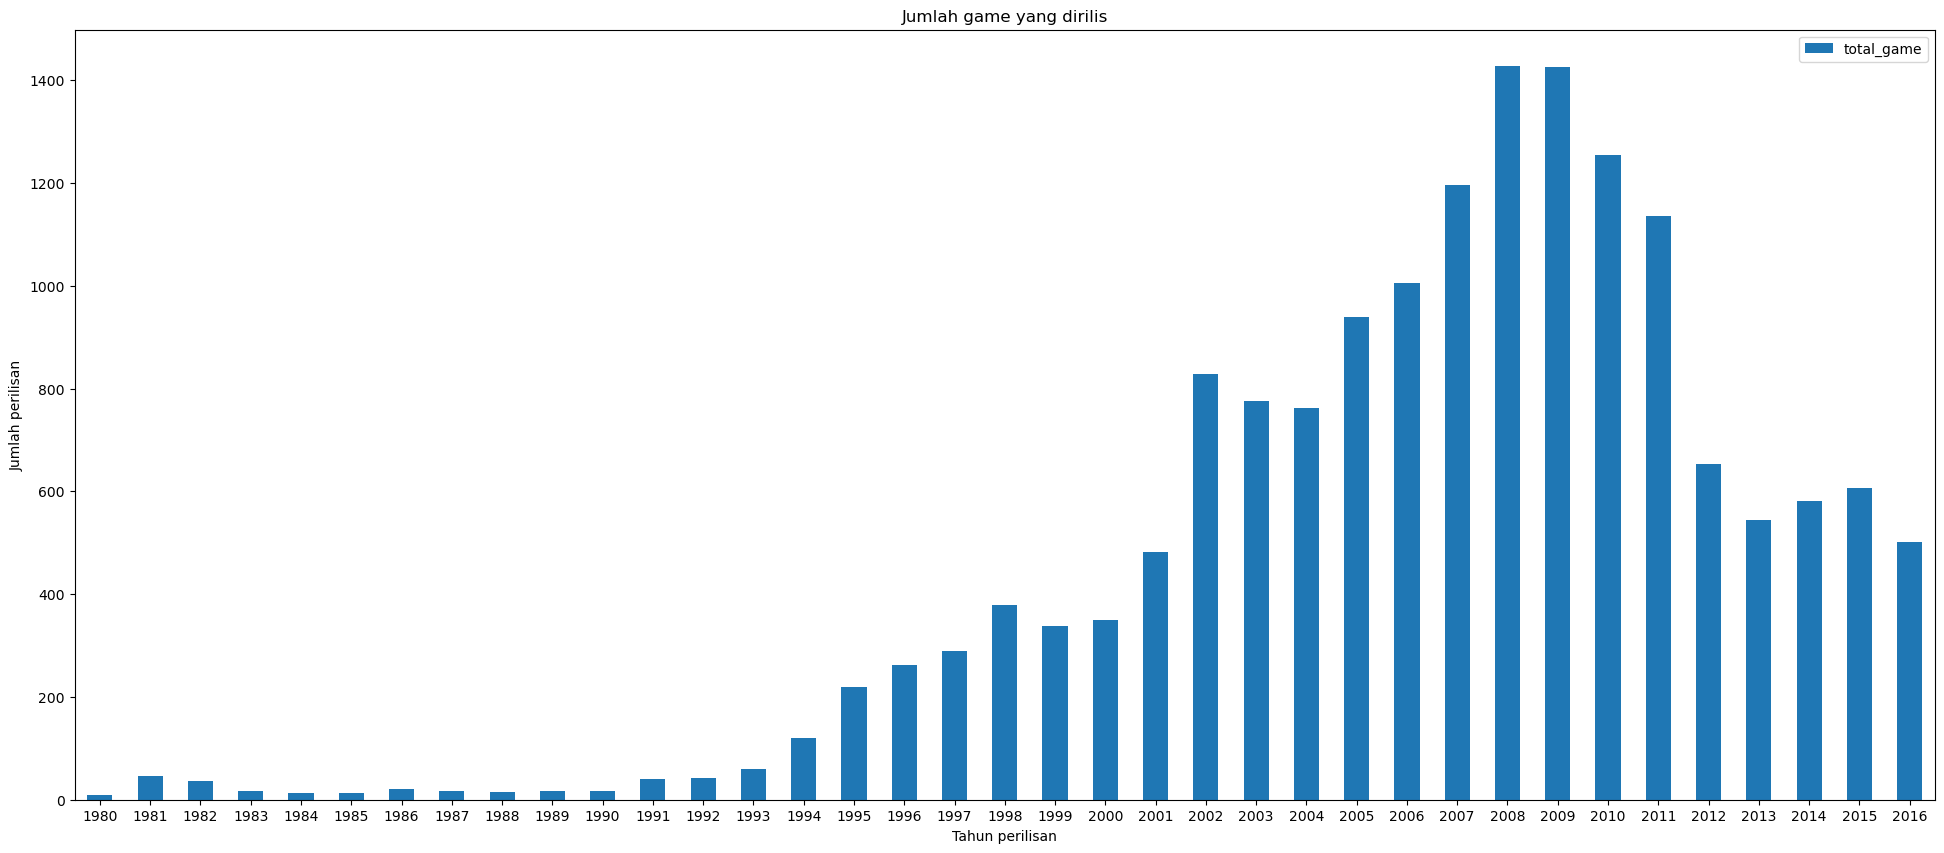

In [56]:
# Memvisualisasikan pivot tabel
total_release.plot(kind='bar', figsize=(24, 10))

# Judul bar plot
plt.title("Jumlah game yang dirilis")

# Nama pada x,y-axis
plt.xlabel('Tahun perilisan')
plt.ylabel('Jumlah perilisan')

# Memutar label x
plt.xticks(rotation=0)

# Menampilkan hasilnya
plt.show()

Antara tahun 1980 - 1994 jumlah game yang dirilis tidak lebih dari 200, mulai dari tahun 1995 jumlah game yang diterbitkan menjadi lebih banyak, puncaknya terjadi pada tahun 2008. Namun setelah itu terjadi penurunan jumlah game yang diterbitkan, dan seperti yang terlihat di setiap periode tidak terjadi perubahan yang signifikan.

[Kembali ke tahapan](#back)

### Variasi penjualan dari satu platform ke platform lainnya <a id="2"></a>

In [57]:
# Membuat pivot table
total_platform = pd.pivot_table(df, index = ['platform'], values= 'total_sales', aggfunc = 'sum')

# Mengurutkan nilai
total_platform = total_platform.sort_values(by='total_sales', ascending=False).reset_index()

# Memeriksa top 5
top_five = total_platform.head()
top_five

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78


ps2 menjadi platform dengan total penjualan terbanyak, untuk menganalisa lebih detail, data diatas akan digunakan.

In [58]:
# Fungsi untuk menampilkan bar chart untuk setiap platform
'''
Definisi:
-----------
    Fungsi untuk menampilkan bar chart untuk setiap platform
-----------
    data:
        dataset yang akan digunakan
    pivot:
        pivot yang diinginkan
    columns:
        kolom dari pivot yang diinginkan
    index_pivot:
        index dari pivot baru yang akan dibuat
    values_pivot:
        values dari pivot baru yang akan dibuat
'''
def show_chart (data, pivot, columns, index_pivot, values_pivot):
    # Kolom 5 penjualan terbanyak
    cols = len(pivot)
    
    # Loop untuk membuat bar chart dari setiap platform teratas
    for row in range(cols):
        
        # Mengambil setiap platform
        each_platform = pivot[columns][row]
        
        # Memfilter dataset setiap platform
        x_slice = data.loc[data[columns] == each_platform]
        
        # Membuat pivot tabel setiap platform
        slice_pivot = pd.pivot_table(x_slice, index = [index_pivot], values= values_pivot, aggfunc = 'sum')
        
        # Bar chart
        slice_pivot.plot(kind='bar', figsize=(12, 5))
        
        # .format mengganti nilai yang ada dalam {} dengan nama platform
        plt.title('Penjualan {}'.format(each_platform))
        
        # Penamaan x,y-axis
        plt.xlabel('Tahun perilisan')
        plt.ylabel('Jumlah perilisan')
        
        # Memutar label x
        plt.xticks(rotation=0)
    return plt.show()

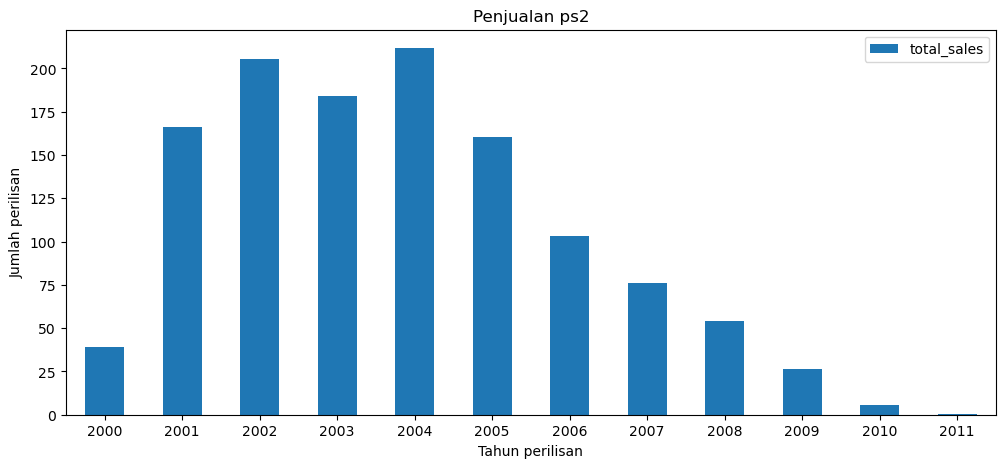

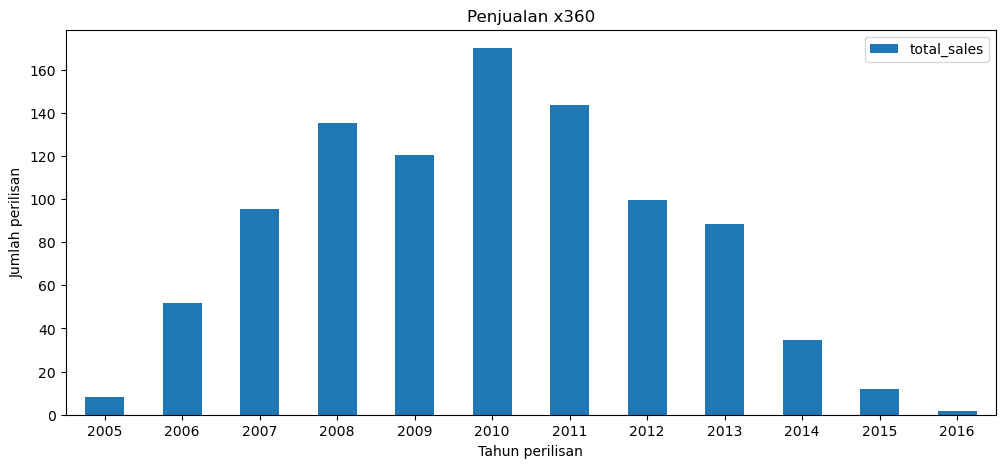

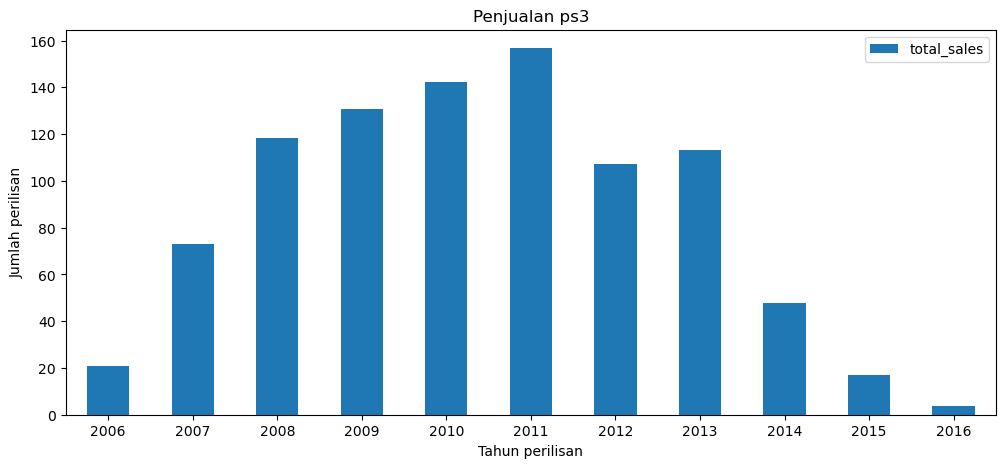

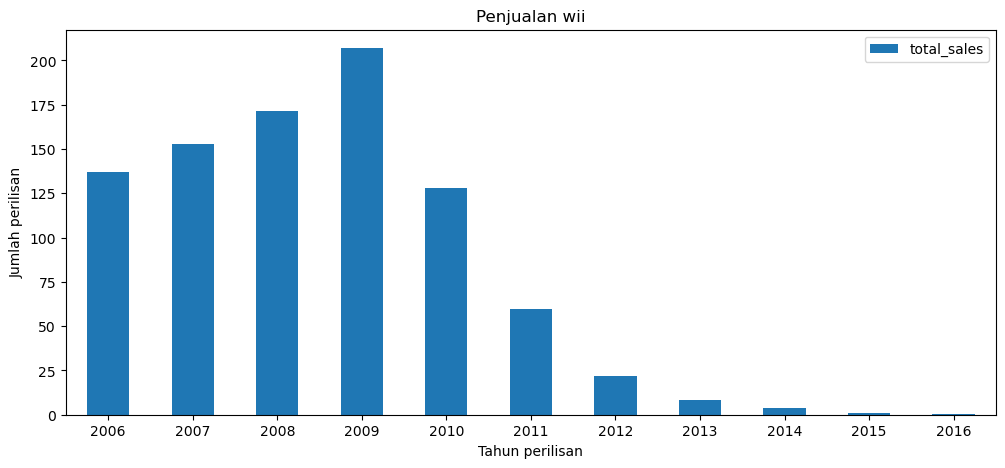

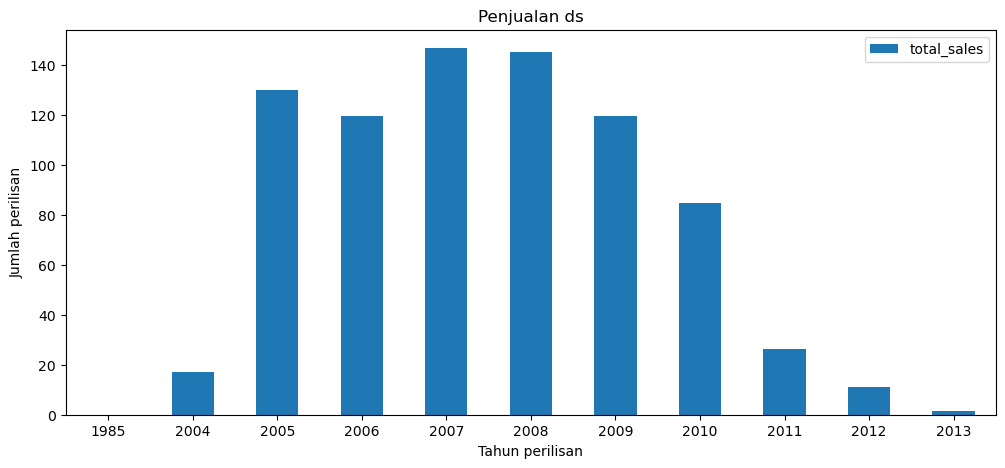

In [59]:
# Menjalankan fungsi
show_chart (data = df, pivot=top_five , columns= 'platform', index_pivot= 'year_of_release', values_pivot= 'total_sales')

Seperti yang terlihat ps2 menjadi platform yang memiliki total penjualan terbanyak dengan tahun 2004 yang menjadi puncak penjualannya. 

Wii sempat populer diawal 3 tahun pertama, namun di tahun 2016 tidak memiliki penjualan apapun.

Platform baru ps2 untuk muncul membutuhkan 6 tahun, x360 dan ps3 5 tahun, wii dan ds 3 tahun sedangkan membutuhkan 7 tahun sebelum platform ps2 tersebut memudar, x360 dan ds 6 tahun, ps3 5 tahun, wii 7 tahun. 

Jadi terhitung sekitar 3-5 tahun untuk sebuah platform muncul, dan membutuhkan sekitar 5-7 tahun untuk sebuah platform untuk kemudian memudar popularitasnya.

[Kembali ke tahapan](#back)

### Penjualan setiap platform sejak tahun 2013 <a id="3"></a>

In [60]:
# Filter data dengan tahun lebih dari atau sama dengan 2006
df_new = df.loc[~(df['year_of_release']<2013)]

In [61]:
# Membuat pivot table
total_platform_new = pd.pivot_table(df_new, index = ['platform'], values= 'total_sales', aggfunc = 'sum')

# Mengurutkan nilai
total_platform_new = total_platform_new.sort_values(by='total_sales', ascending=False).reset_index()

# Memeriksa hasilnya
total_platform_new

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,39.43
7,psv,32.99
8,wii,13.66
9,psp,3.50


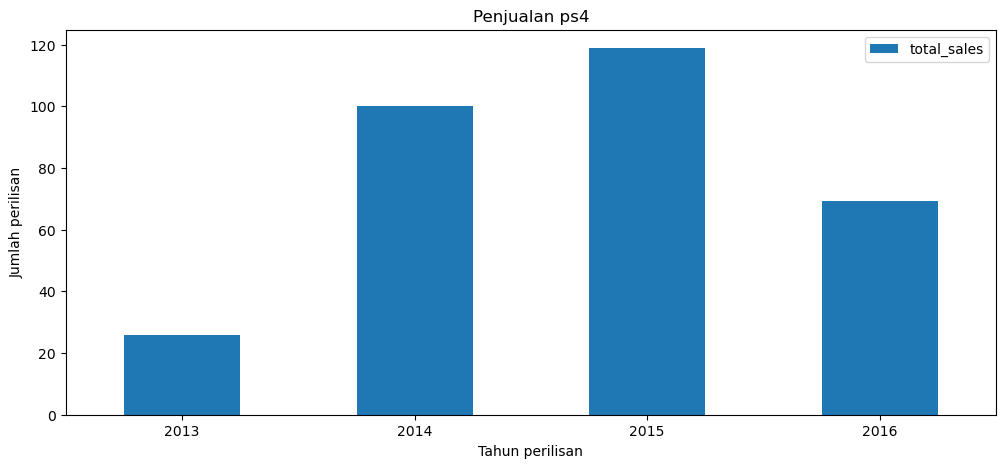

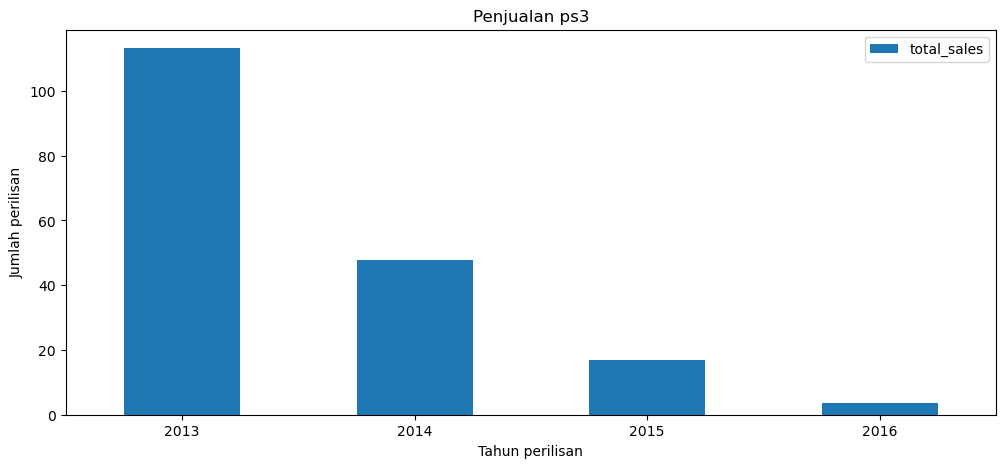

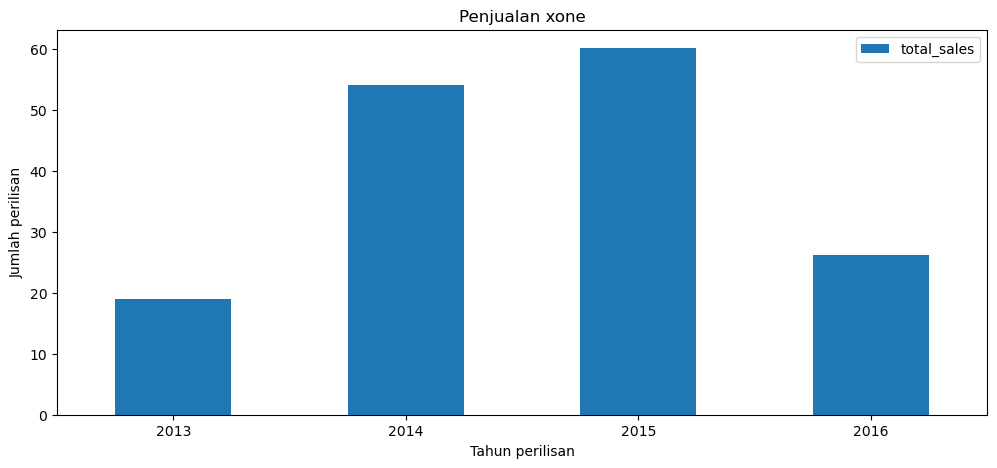

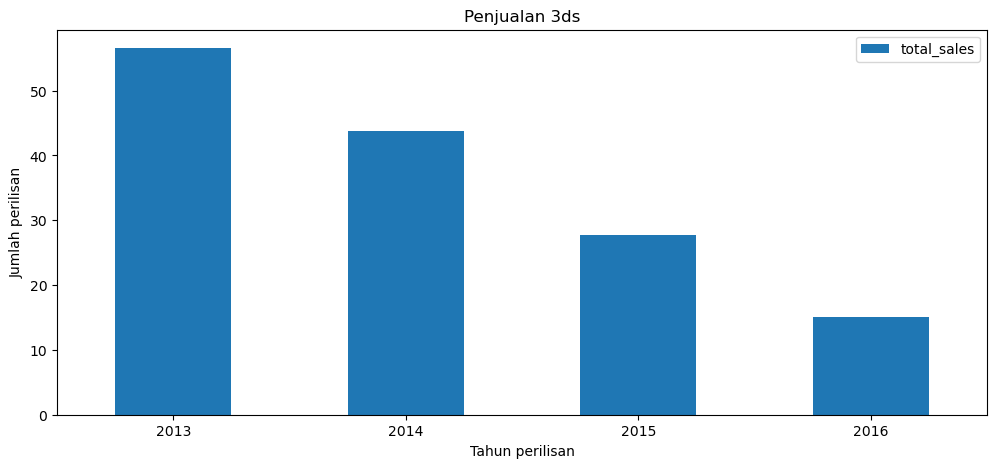

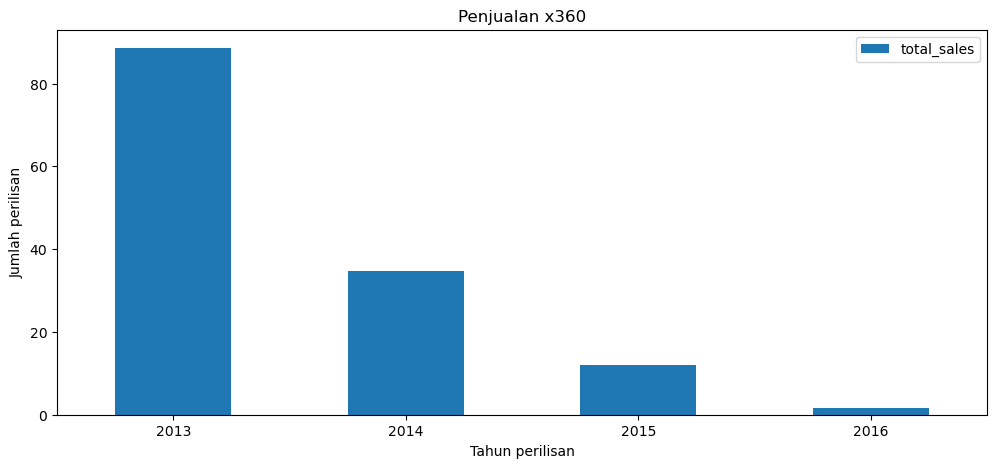

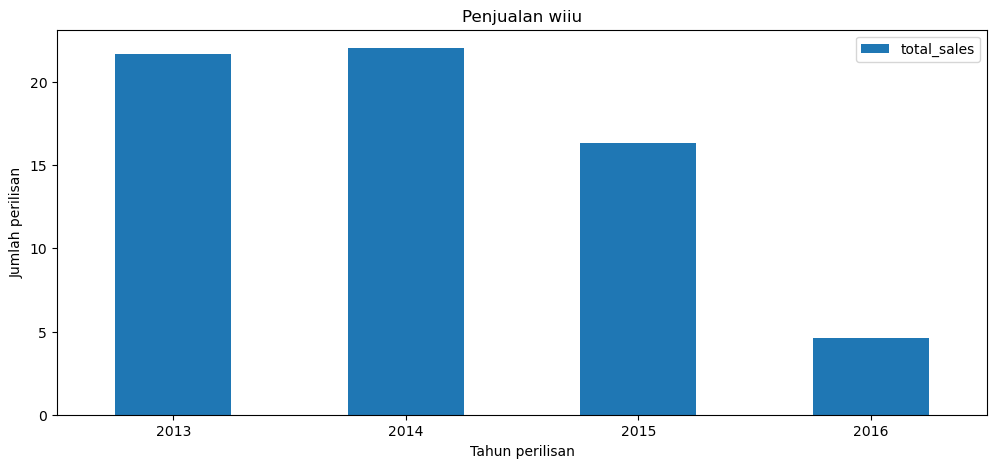

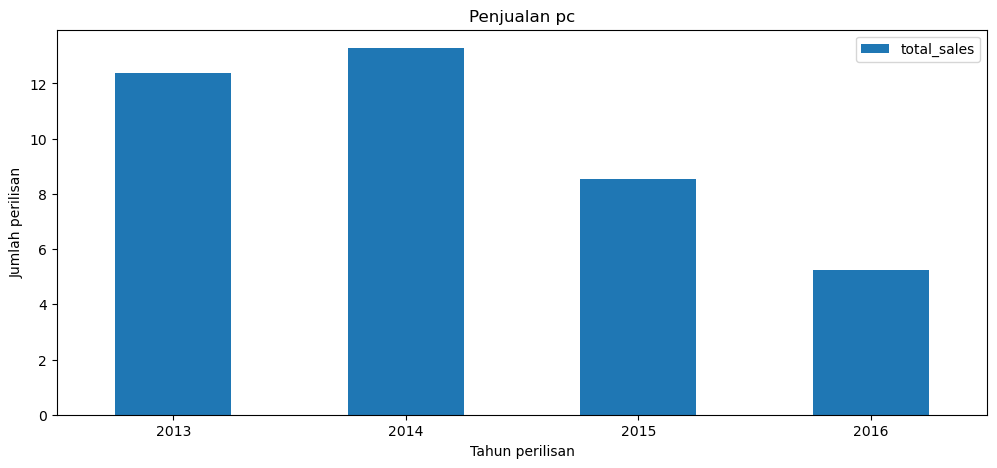

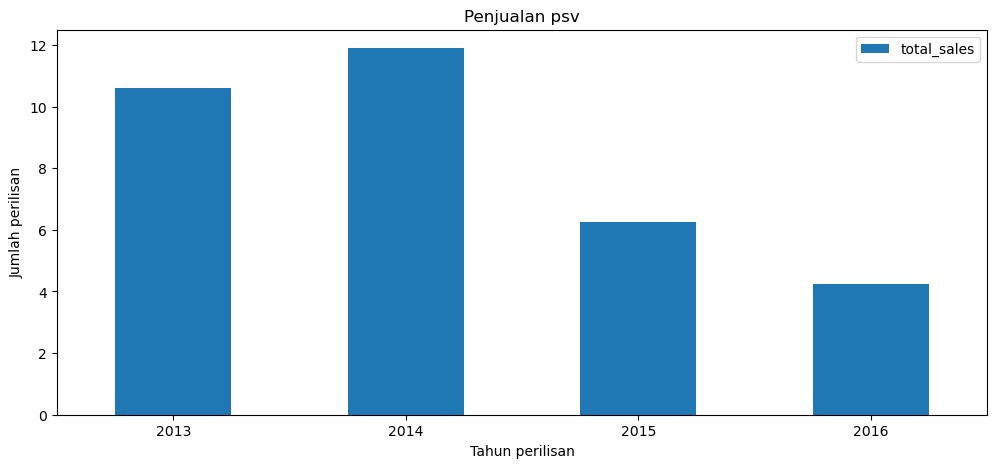

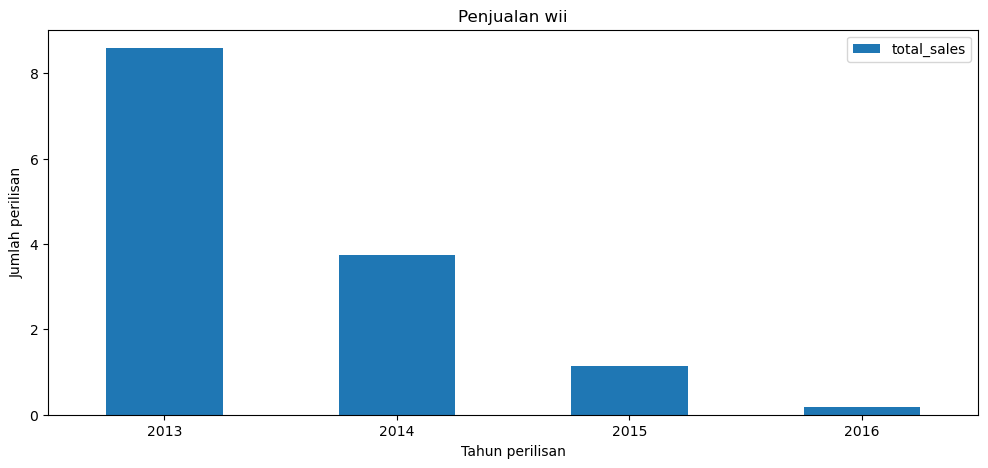

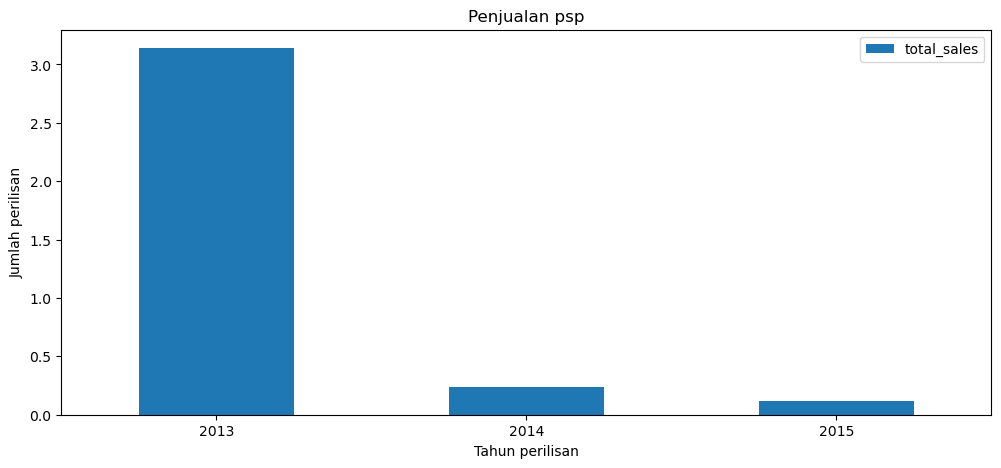

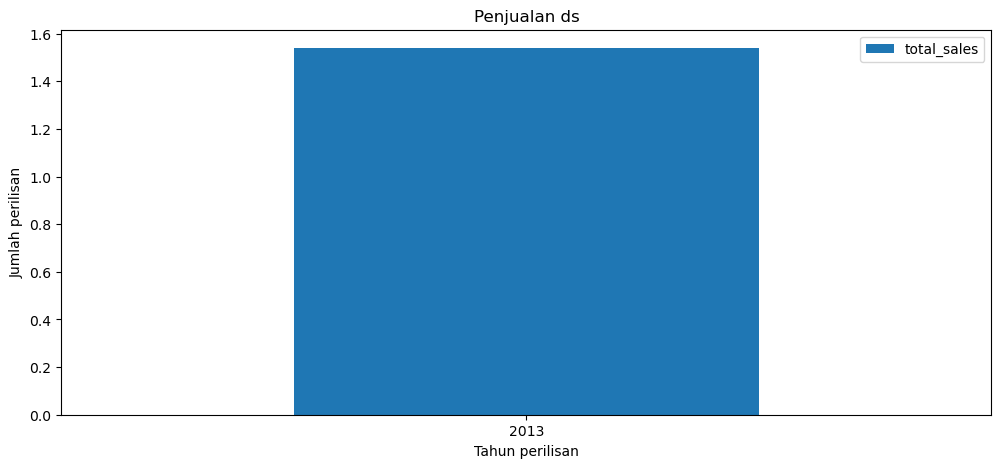

In [62]:
# Menjalankan fungsi
show_chart (data= df_new, pivot=total_platform_new , columns= 'platform', index_pivot= 'year_of_release', values_pivot= 'total_sales')

Penjualan terbanyak ada pada platform ps4. Platform yang mengalami pertumbuhan ps4 dan xone, sedangkan yang mengalami penyusutan adalah ps3, 3ds, x360, wiiu, pc, psv, wii, psp.

[Kembali ke tahapan](#back)

### Potensi keuntungan pada platform <a id="4"></a>

Untuk platform yang mengalami pertumbuhan bisa digunakan acuan untuk mengetahui potensi keuntungan pada platform, kecuali platform ds yang hanya memperoleh penjualan pada tahun 2013.

In [63]:
# Filter data yang dibutuhkan
df_platform = df_new.loc[df_new['platform'].str.contains('ps4|xone|ps3|3ds', regex=True)]

In [64]:
# Membuat pivot table
platform_pivot = pd.pivot_table(df_platform, index = ['platform'], values= 'total_sales', aggfunc = ['sum', 'mean', 'median'])

# Merubah nama kolom
platform_pivot.columns = ['total_sales', 'mean', 'median']

# Mengurutkan nilai
platform_pivot = platform_pivot.sort_values(by='total_sales', ascending=False)

# Memeriksa hasilnya
platform_pivot

,total_sales,mean,median
platform,,,
ps4,314.14,0.801378,0.20
ps3,181.43,0.525884,0.15
xone,159.32,0.645020,0.22
3ds,143.25,0.472772,0.09


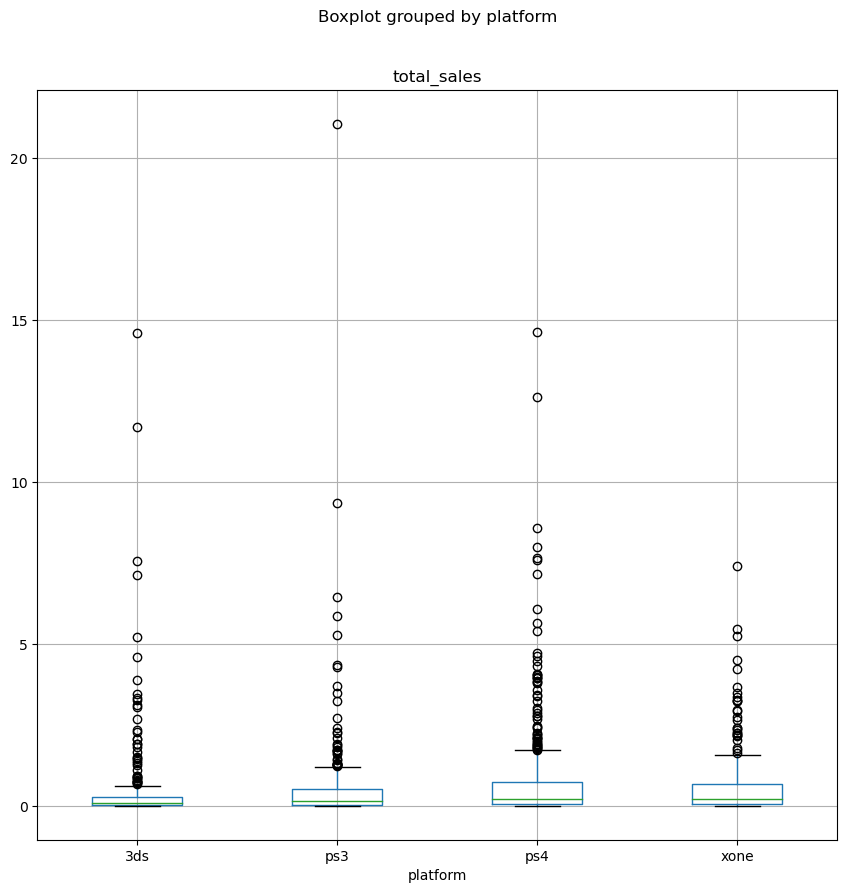

In [65]:
# Boxplot kolom `total_sales`
df_platform.boxplot(column='total_sales', by='platform', figsize=(10, 10))

# Menampilkan hasilnya
plt.show()

Perbedaan median dari platform ps3, ps4, dan xone tidak signifikan, sedangkan platform 3ds memiliki median terkecil dari semua platform, rata-rata penjualan tertinggi diperoleh dari platform ps4, namun tidak ada perbedaan yang signifikan dengan ps3 dan xone, yang paling sedikit penjualannya didapat di platform 3ds.

[Kembali ke tahapan](#back)

### Pengaruh ulasan pada penjualan platform <a id="5"></a>

**Untuk platform ps4**

In [66]:
# Filter platform ps4
only_ps4 = df_new.loc[df_new['platform']=='ps4']

In [67]:
# Fungsi untuk menampilkan scatter plot untuk sebuah platform
'''
Definisi:
-----------
    Fungsi untuk menampilkan scatter plot untuk sebuah platform
-----------
    data:
        dataset yang akan digunakan
    title:
        judul dari scatter plot
'''
def correlation (data, title):
    # Kolom ulasan
    which_cols=['critic_score', 'user_score']

    # Scatter plot
    for col_name in which_cols:
        
        # Plot chart
        data.plot(x=col_name, y='total_sales', kind='scatter')
        
        # Judul
        plt.title('{}s vs total sales scatter plot'.format(col_name))
        
        # Sub-judul
        plt.suptitle(title)
    return plt.show()   

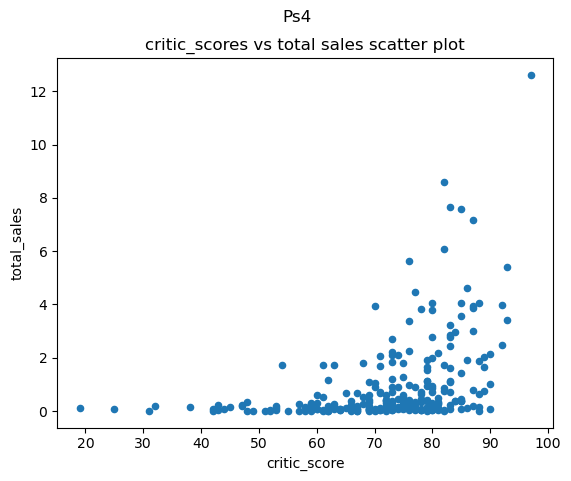

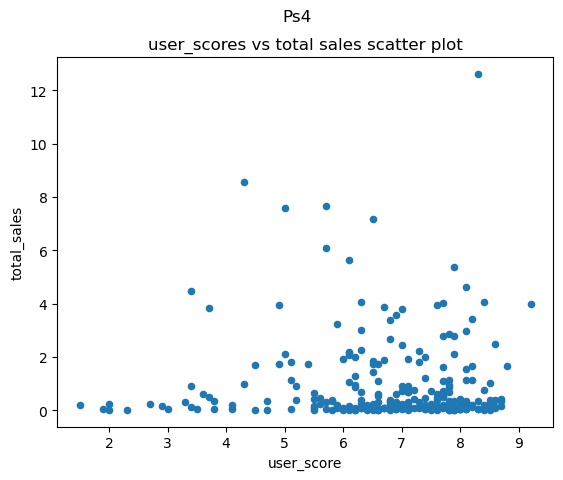

In [68]:
# Menjalankan fungsi
correlation (data = only_ps4, title = 'Ps4')

**koefisien korelasi Pearson**, memberi tahu kita berapa banyak satu nilai berubah ketika yang lain berubah. Koefisien ini mengambil nilai dari -1 hingga 1.

- Jika suatu nilai meningkat bersama dengan nilai yang lain, koefisien korelasi Pearson akan menunjukkan angka positif.
- Jika suatu nilai tetap sama ketika yang lain berubah, koefisiennya adalah 0.
- Jika salah satu nilai berkurang ketika yang lain meningkat, koefisiennya adalah negatif.

Semakin dekat koefisiennya dengan -1 atau 1, semakin kuat ketergantungannya. Nilai yang mendekati 0 menandakan adanya koneksi yang lemah, sedangkan nilai 0 dapat menandakan bahwa tidak ada koneksi atau ada koneksi non-linear yang kompleks yang tidak dapat ditunjukkan oleh koefisien.

In [69]:
# Koefisien korelasi
print('Critic score vs Total sales:', only_ps4['critic_score'].corr(only_ps4['total_sales']))
print('User score vs Total sales:', only_ps4['user_score'].corr(only_ps4['total_sales']))

Critic score vs Total sales: 0.40656790206178095
User score vs Total sales: -0.031957110204556424


Seperti yang terlihat ada korelasi antara critic score (ulasan dari kritikus) dengan total penjualan, dan untuk korelasi user score (ulasan dari pengguna) dengan total penjualan tidak terlalu signifikan bahkan hampir tidak ada korelasi.

[Kembali ke tahapan](#back)

**Untuk platform ps3**

In [70]:
# Filter platform ps3
only_ps3 = df_new.loc[df_new['platform']=='ps3']

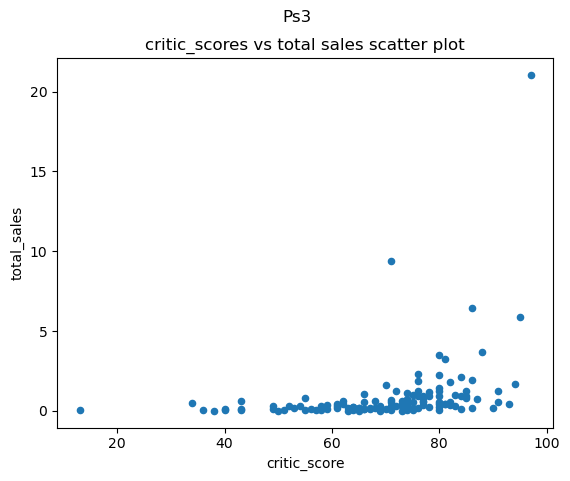

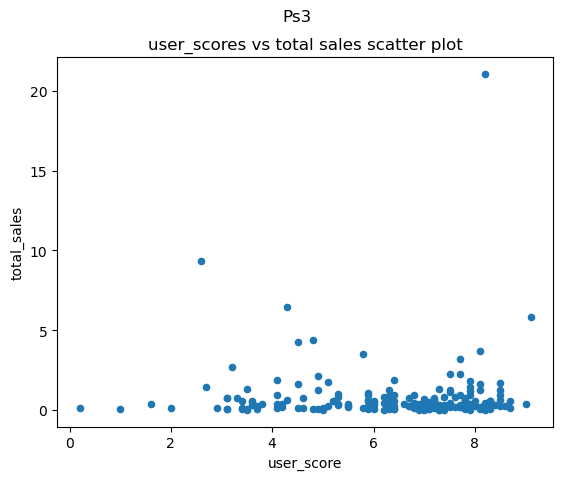

In [71]:
# Menjalankan fungsi
correlation (data = only_ps3, title = 'Ps3')

In [72]:
# Koefisien korelasi
print('Critic score vs Total sales:', only_ps3['critic_score'].corr(only_ps3['total_sales']))
print('User score vs Total sales:', only_ps3['user_score'].corr(only_ps3['total_sales']))

Critic score vs Total sales: 0.3342853393371919
User score vs Total sales: 0.0023944027357566925


Seperti yang terlihat dengan hasil yang kurang lebih sama dengan ps4 ada korelasi antara critic score (ulasan dari kritikus) dengan total penjualan meskipun tidak setinggi platform ps4, dan untuk korelasi user score (ulasan dari pengguna) dengan total penjualan tidak terlalu signifikan bahkan hampir tidak ada korelasi.

[Kembali ke tahapan](#back)

**Untuk platform xbox-one**

In [73]:
# Filter platform xone
only_xone = df_new.loc[df_new['platform']=='xone']

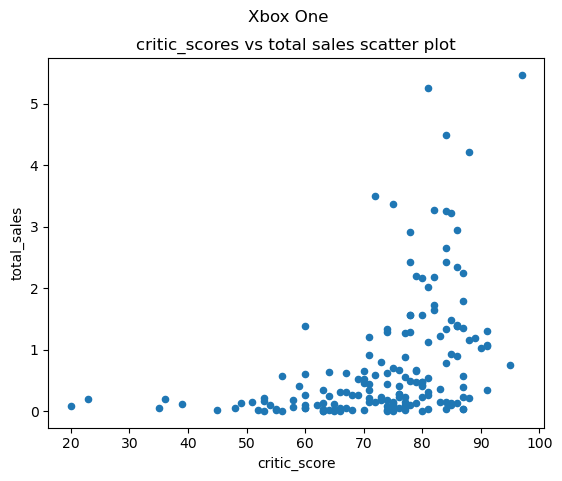

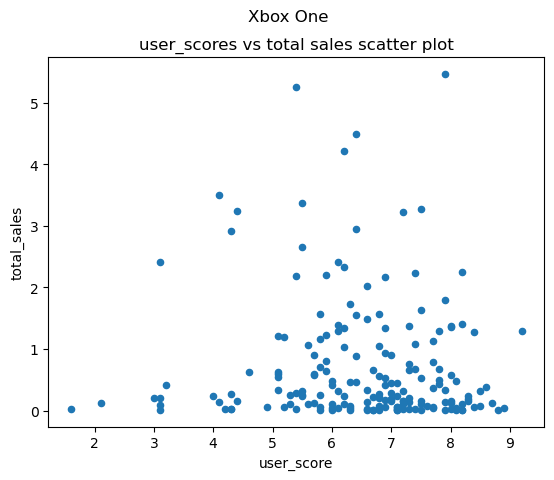

In [74]:
# Menjalankan fungsi
correlation (data = only_xone, title = 'Xbox One')

In [75]:
# Koefisien korelasi
print('Critic score vs Total sales:', only_xone['critic_score'].corr(only_xone['total_sales']))
print('User score vs Total sales:', only_xone['user_score'].corr(only_xone['total_sales']))

Critic score vs Total sales: 0.4169983280084017
User score vs Total sales: -0.06892505328279414


Seperti yang terlihat masih dengan hasil yang kurang lebih sama dengan ps4 dan ps3 ada korelasi antara critic score (ulasan dari kritikus) dengan total penjualan, dan untuk korelasi user score (ulasan dari pengguna) dengan total penjualan tidak terlalu signifikan bahkan hampir tidak ada korelasi.

[Kembali ke tahapan](#back)

### Genre yang paling menguntungkan <a id="6"></a>

In [76]:
# Distribusi genre
genre_dist = df_new['genre'].value_counts()

# Menampilkan hasilnya
genre_dist

action          766
role-playing    292
adventure       245
sports          214
shooter         187
misc            155
racing           85
fighting         80
platform         74
simulation       62
strategy         56
puzzle           17
Name: genre, dtype: int64

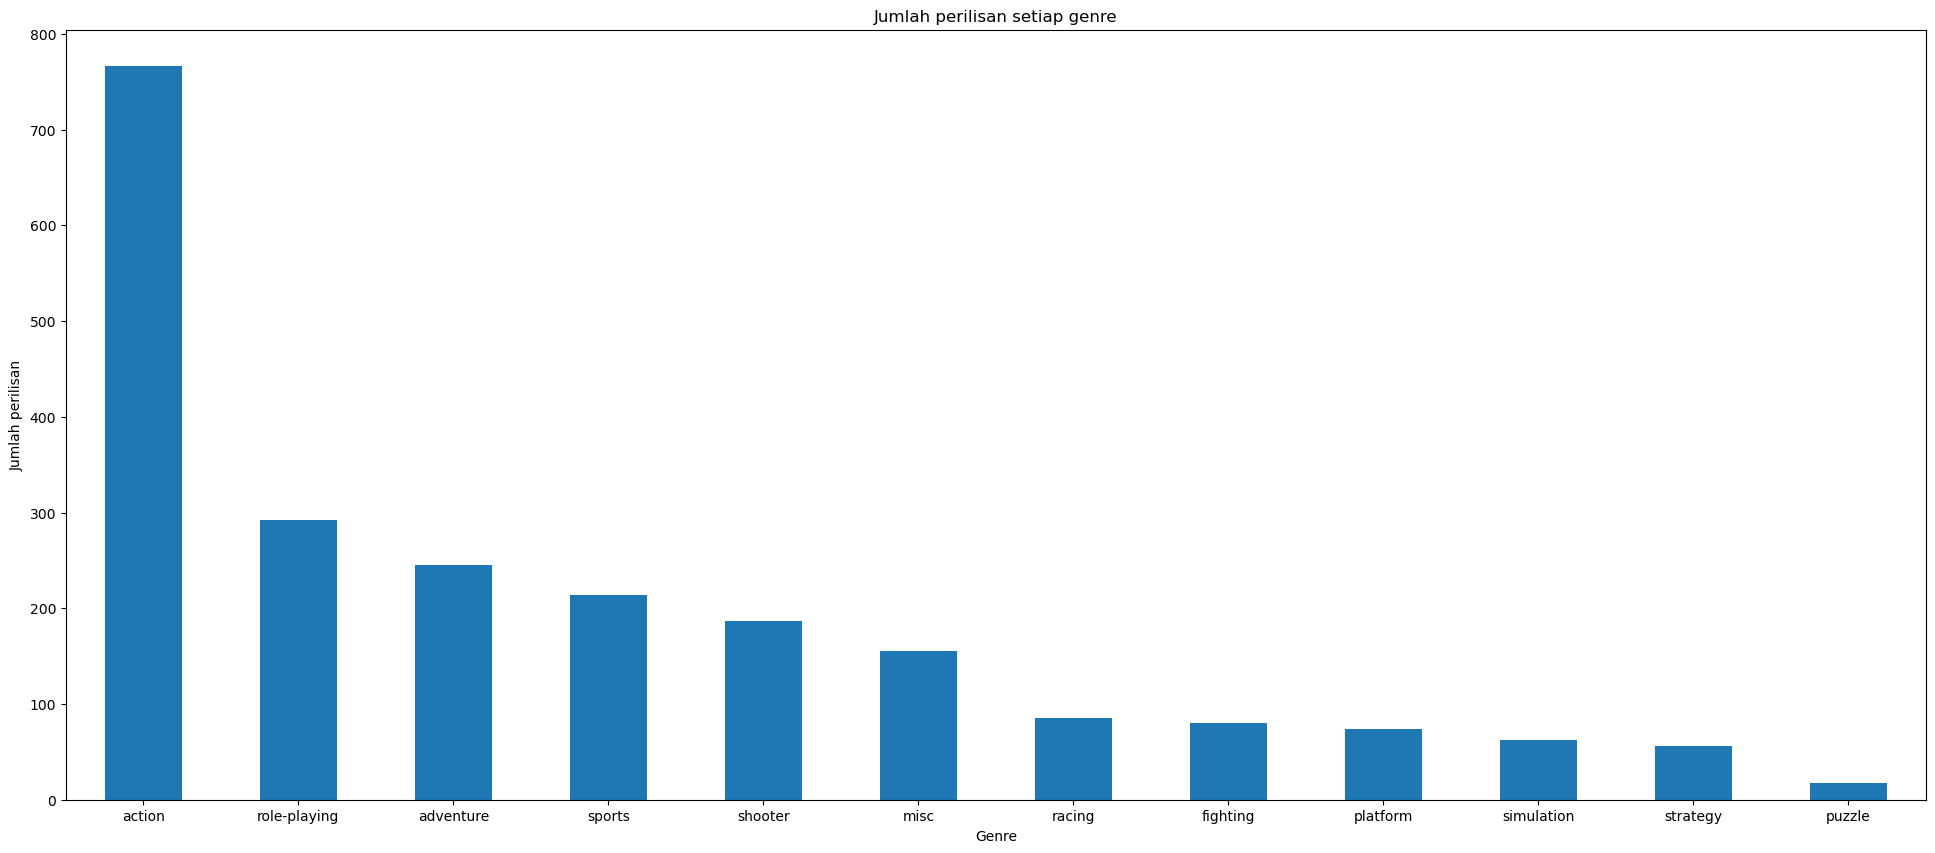

In [77]:
# Memvisualisasikan distribusi genre
genre_dist.plot(kind='bar', figsize=(24, 10))

# Judul histogram
plt.title("Jumlah perilisan setiap genre")

# Penamaan x,y-axis
plt.xlabel('Genre')
plt.ylabel('Jumlah perilisan')

# Memutar label x
plt.xticks(rotation=0)

# Menampilkan hasilnya
plt.show()

Genre action menjadi genre yang paling banyak dibandingkan genre lainnya yang sudah dirilis.

In [78]:
# Membuat pivot table
genre_sales = pd.pivot_table(df, index = ['genre'], values= 'total_sales', aggfunc = 'sum')

# Mengurutkan nilai
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)

# Memeriksa hasilnya
genre_sales

,total_sales
genre,
action,1716.52
sports,1309.67
shooter,1041.36
role-playing,931.08
platform,825.55
misc,790.29
racing,723.49
fighting,442.66
simulation,387.96


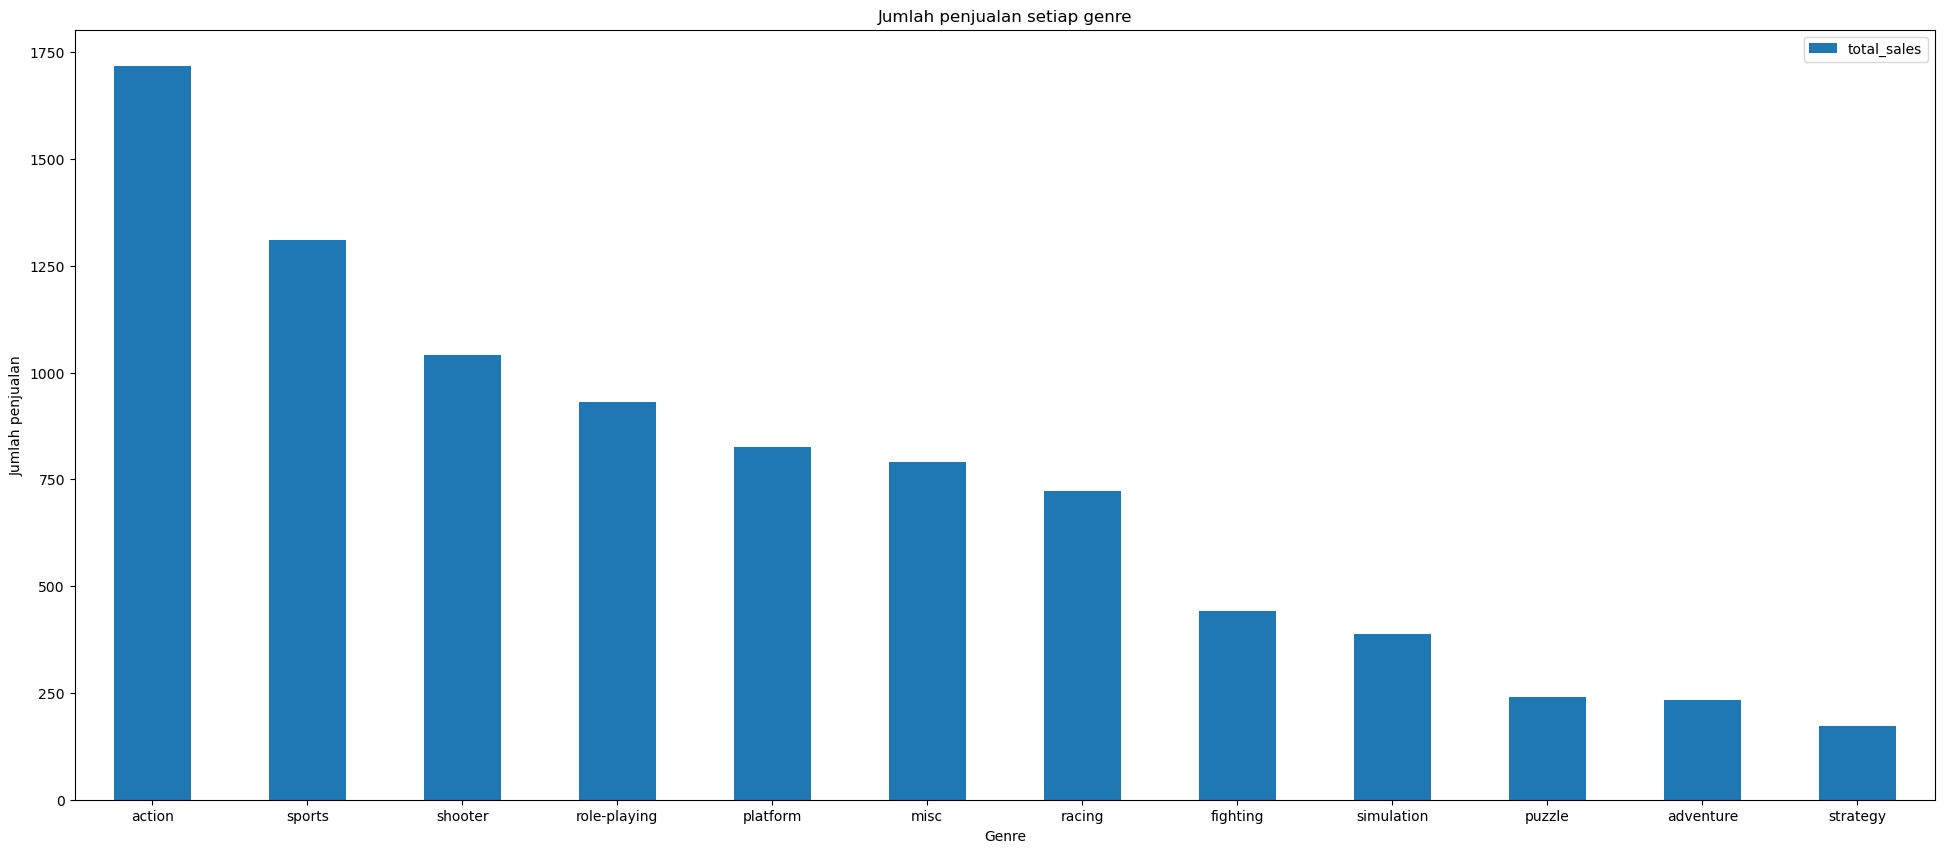

In [79]:
# Memvisualisasikan distribusi genre
genre_sales.plot(kind='bar', figsize=(24, 10))

# Judul histogram
plt.title("Jumlah penjualan setiap genre")

# Penamaan x,y-axis
plt.xlabel('Genre')
plt.ylabel('Jumlah penjualan')

# Memutar label x
plt.xticks(rotation=0)

# Menampilkan hasilnya
plt.show()

Seperti yang terlihat tidak hanya menjadi yang paling banyak, genre action juga memiliki total penjualan terbanyak. Genre strategy menjadi genre dengan penjualan yang paling sedikit dibandingkan genre-genre lainnya.

[Kembali ke tahapan](#back)

### Profil pengguna setiap daerah <a id="7"></a>

#### Platform

In [80]:
# Membuat pivot tabel 
user_na_platform = pd.pivot_table(df_new, index = 'platform', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_platform = pd.pivot_table(df_new, index = 'platform', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_platform = pd.pivot_table(df_new, index = 'platform', values= 'jp_sales', aggfunc = 'sum').reset_index()

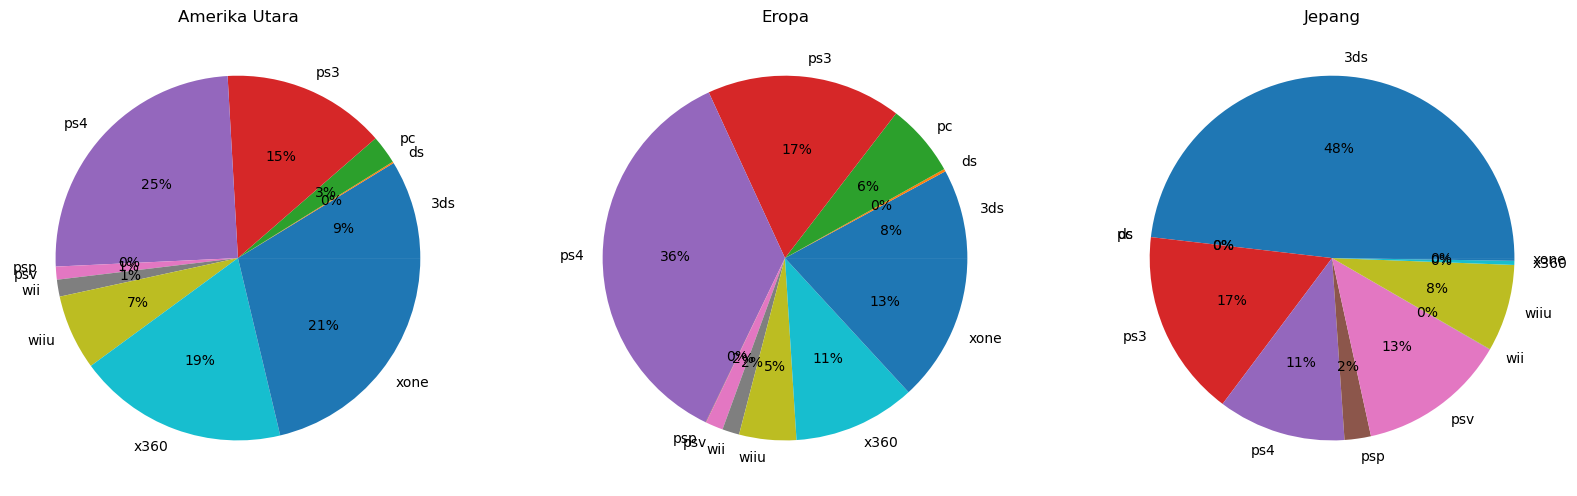

In [81]:
# Membuat pie chart
# 1 baris 3 kolom
fig = plt.figure(figsize=(20,20))

# Baris pertama, kolom pertama
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_platform.na_sales, labels= user_na_platform['platform'], autopct='%1.0f%%')
plt.title('Amerika Utara')

# Baris pertama, kolom kedua
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_platform.eu_sales, labels= user_eu_platform['platform'], autopct='%1.0f%%')
plt.title('Eropa')

# Baris pertama, kolom ketiga
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_platform.jp_sales, labels= user_jp_platform['platform'], autopct='%1.0f%%')
plt.title('Jepang')

# Menampilkan hasilnya
plt.show()

In [82]:
# Mengurutkan setiap pivot tabel
na_top_platform = user_na_platform.sort_values(by='na_sales', ascending=False)
eu_top_platform = user_eu_platform.sort_values(by='eu_sales', ascending=False)
jp_top_platform = user_jp_platform.sort_values(by='jp_sales', ascending=False)

# Menampilkan hasilnya
print(na_top_platform.head())
print()
print(eu_top_platform.head())
print()
print(jp_top_platform.head())

   platform  na_sales
4       ps4    108.74
10     xone     93.12
9      x360     81.66
3       ps3     63.50
0       3ds     38.20

   platform  eu_sales
4       ps4    141.09
3       ps3     67.81
10     xone     51.59
9      x360     42.52
0       3ds     30.96

  platform  jp_sales
0      3ds     67.81
3      ps3     23.35
6      psv     18.59
4      ps4     15.96
8     wiiu     10.88


Seperti yang terlihat di Amerika Utara dan eropa ps4 menjadi yang paling banyak terjual Xbox one menempati peringkat ke 2, sedangkan di Jepang peminat 3ds menjadi yang paling banyak, dan ada ps4 dalam top 5 platform yang terjual.

[Kembali ke tahapan](#back)

#### Genre

In [83]:
# Membuat pivot tabel 
user_na_genre = pd.pivot_table(df_new, index = 'genre', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_genre = pd.pivot_table(df_new, index = 'genre', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_genre = pd.pivot_table(df_new, index = 'genre', values= 'jp_sales', aggfunc = 'sum').reset_index()

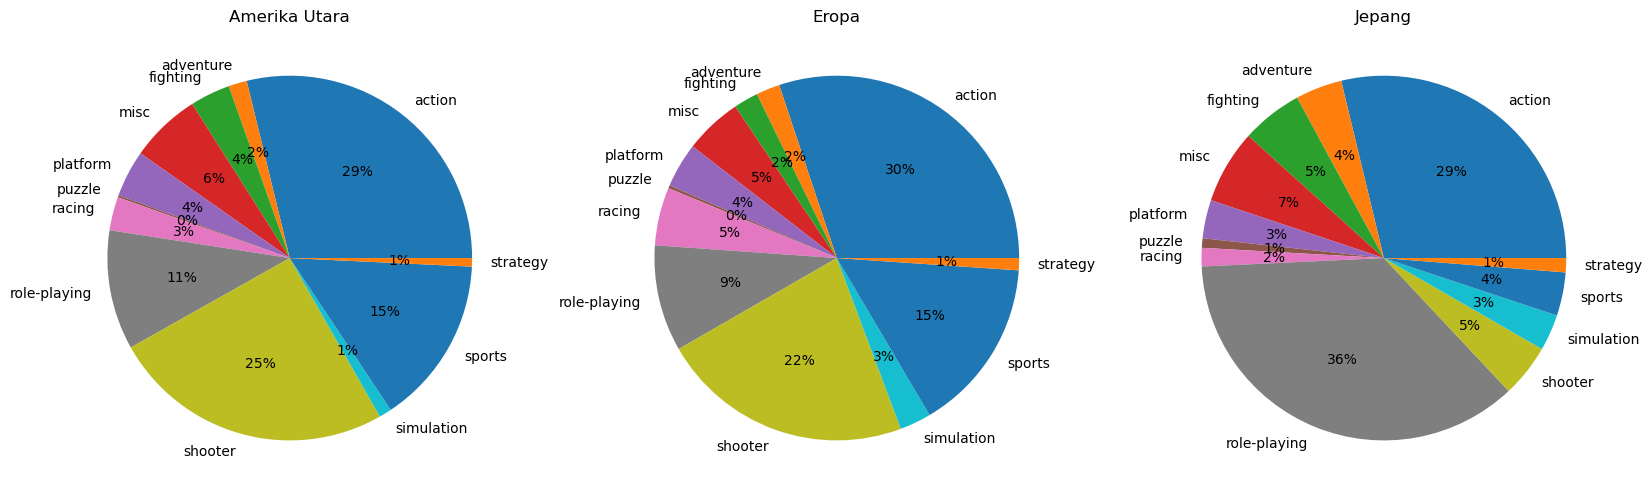

In [84]:
# Membuat pie chart
# 1 baris 3 kolom
fig = plt.figure(figsize=(20,20))

# Baris pertama, kolom pertama
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_genre.na_sales, labels= user_na_genre['genre'], autopct='%1.0f%%')
plt.title('Amerika Utara')

# Baris pertama, kolom kedua
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_genre.eu_sales, labels= user_eu_genre['genre'], autopct='%1.0f%%')
plt.title('Eropa')

# Baris pertama, kolom ketiga
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_genre.jp_sales, labels= user_jp_genre['genre'], autopct='%1.0f%%')
plt.title('Jepang')

# Menampilkan hasilnya
plt.show()

In [85]:
# Mengurutkan setiap pivot
na_top_genre = user_na_genre.sort_values(by='na_sales', ascending=False)
eu_top_genre = user_eu_genre.sort_values(by='eu_sales', ascending=False)
jp_top_genre = user_jp_genre.sort_values(by='jp_sales', ascending=False)

# Menampilkan hasilnya
print(na_top_genre.head())
print()
print(eu_top_genre.head())
print()
print(jp_top_genre.head())

           genre  na_sales
0         action    126.05
8        shooter    109.74
10        sports     65.27
7   role-playing     46.40
3           misc     27.49

           genre  eu_sales
0         action    118.13
8        shooter     87.86
10        sports     60.52
7   role-playing     36.97
6         racing     20.19

          genre  jp_sales
7  role-playing     51.04
0        action     40.49
3          misc      9.20
2      fighting      7.65
8       shooter      6.61


Seperti yang terlihat baik di Amerika Utara atau Eropa genre action menjadi yang paling banyak terjual, sedangkan di Jepang genre role-playing menjadi yang paling banyak, diikuti genre action.

[Kembali ke tahapan](#back)

#### Rating

In [86]:
# Membuat pivot tabel 
user_na_rating = pd.pivot_table(df_new, index = 'rating', values= 'na_sales', aggfunc = 'sum').reset_index()
user_eu_rating = pd.pivot_table(df_new, index = 'rating', values= 'eu_sales', aggfunc = 'sum').reset_index()
user_jp_rating = pd.pivot_table(df_new, index = 'rating', values= 'jp_sales', aggfunc = 'sum').reset_index()

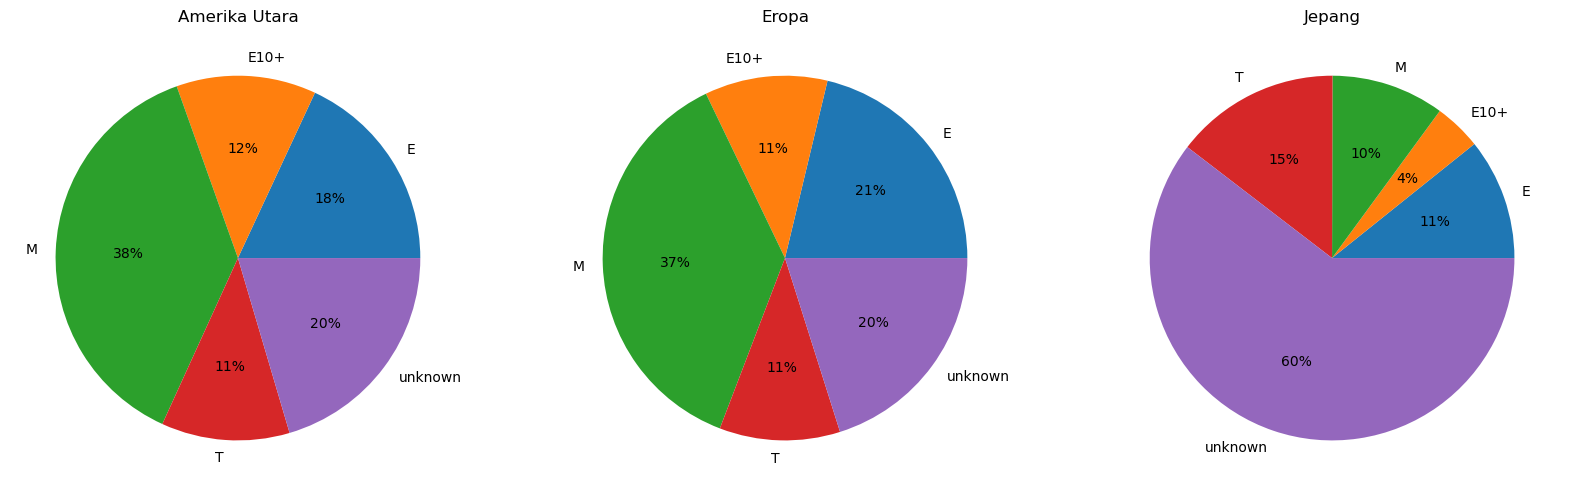

In [87]:
# Membuat pie chart
# 1 baris 3 kolom
fig = plt.figure(figsize=(20,20))

# Baris pertama, kolom pertama
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(user_na_rating.na_sales, labels= user_na_rating['rating'], autopct='%1.0f%%')
plt.title('Amerika Utara')

# Baris pertama, kolom kedua
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(user_eu_rating.eu_sales, labels= user_eu_rating['rating'], autopct='%1.0f%%')
plt.title('Eropa')

# Baris pertama, kolom ketiga
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(user_jp_rating.jp_sales, labels= user_jp_rating['rating'], autopct='%1.0f%%')
plt.title('Jepang')

# Menampilkan hasilnya
plt.show()

In [88]:
# Mengurutkan setiap pivot
na_top_rating = user_na_rating.sort_values(by='na_sales', ascending=False)
eu_top_rating = user_eu_rating.sort_values(by='eu_sales', ascending=False)
jp_top_rating = user_jp_rating.sort_values(by='jp_sales', ascending=False)

# Menampilkan hasilnya
print(na_top_rating.head())
print()
print(eu_top_rating.head())
print()
print(jp_top_rating.head())

    rating  na_sales
2        M    165.21
4  unknown     89.42
0        E     79.05
1     E10+     54.24
3        T     49.79

    rating  eu_sales
2        M    145.32
0        E     83.36
4  unknown     78.91
1     E10+     42.69
3        T     41.95

    rating  jp_sales
4  unknown     85.05
3        T     20.59
0        E     15.14
2        M     14.11
1     E10+      5.89


Seperti yang terlihat baik di Amerika Utara atau Eropa rating M (Mature) menjadi yang paling banyak terjual, sedangkan di Jepang rating unknown menjadi yang paling banyak, diikuti rating T (Teen).

[Kembali ke tahapan](#back)

## Menguji Hipotesis <a id="Test"></a>

In [89]:
# Memeriksa missing value
df_new.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score         1041
rating                0
total_sales           0
dtype: int64

In [90]:
# Memfilter missing value
df_clean = df_new.dropna()

In [91]:
# Memeriksa missing value
df_clean.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

Uji hipotesis kali ini akan menggunakan t-test dimana sampel untuk menguji perbedaan antara dua variabel.

ada beberapa jenis T-test, seperti *one sample t-test, independent sample t-test, dan paired sample t-test*, dan untuk saat ini yang akan digunakan adalah *Independent sample t-test* karena sample yang akan diuji memiliki perbedaan.

T-test sendiri memiliki nilai *p-value* atau probabilitas kemunculan nilai dan juga *alpha* atau batas error yang digunakan.

Jadi, jika p-value lebih kecil dari alpha, maka kita bisa menyimpulkan bahwa bukti cukup kuat untuk menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Sedangkan, jika p-value lebih besar dari alpha, maka kita gagal menolak hipotesis nol (H0) dan belum bisa mengambil kesimpulan apapun tentang hipotesis alternatif (H1).

### Rata-rata rating pengguna platform Xbox One dan PC <a id="h1"></a>

Sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
2. H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah tidak sama.

Jika H0 mendefinisikan rata-rata rating pengguna platform Xbox One dan PC adalah 'sama', maka H1 akan mendefinisikan kebalikan dari H0 yaitu rata-rata rating pengguna platform Xbox One dan PC adalah 'tidak sama'.

Untuk saat ini alpha yang digunakan adalah 5%, kenapa tidak 1%, atau 10%?, karena 5% adalah angka yang seimbang untuk menghindari type-I error, atau type-II error.

Type-I error mendukung hipotesis alternatif (H1) saat hipotesis nol (H0) benar, sedangakan type-II error tidak mendukung hipotesis nol (H0) disaat hipotesis alternatif (H1) benar.

In [92]:
# Filter data
xone_only = df_clean.loc[df_new['platform'] == 'xone']
pc_only = df_clean.loc[df_new['platform'] == 'pc']

In [93]:
# Varians xone
np.var(xone_only['user_score'])

1.7855118457300287

In [94]:
# Varians pc
np.var(pc_only['user_score'])

2.9126310262965673

In [95]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(xone_only['user_score'], pc_only['user_score'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 0.17882648263401307
Kita tidak bisa mengabaikan hipotesis nol


Seperti yang dijelaskan diatas, karena nilai p-value lebih besar dari alpha maka hipotesis nol tidak bisa diabaikan, yang berarti rata-rata rating pengguna platform Xbox One dan PC adalah sama.

[Kembali ke tahapan](#back)

### Rata-rata rating pengguna genre Action dan Sports <a id="h2"></a>

Sama halnya dengan uji hipotesis diatas, sebelum memulai pengujian hipotesis, hipotesis nol (H0) dan hipotesis alternatif (H1) harus ditentukan terlebih dahulu.
1. H0 : Rata-rata rating pengguna genre Action dan Sports sama.
2. H1 : Rata-rata rating pengguna genre Action dan Sports tidak sama.

Jika H0 mendefinisikan rata-rata rating pengguna genre Action dan Sports 'tidak sama', maka H1 akan mendefinisikan kebalikan dari H0 yaitu rata-rata rating pengguna genre Action dan Sports 'sama'.

In [96]:
# Filter data
action_only = df_clean.loc[df_new['genre'] == 'action']
sports_only = df_clean.loc[df_new['genre'] == 'sports']

In [97]:
# Varians action
np.var(action_only['user_score'])

1.6408868780176133

In [98]:
# Varians sports
np.var(sports_only['user_score'])

2.1122611570247933

In [99]:
# Alpha ditentukan 0.05
alpha = 0.05

# T-test
results = st.ttest_ind(sports_only['user_score'], action_only['user_score'], equal_var=False)

# Menampilkan hasilnya
print('p-value:', results.pvalue)

# Menampilkan hasilnya berdasarkan kondisi
if results.pvalue < alpha:
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak bisa mengabaikan hipotesis nol') 

p-value: 1.0496920005008588e-13
Kita menolak hipotesis nol


Seperti yang dijelaskan diatas, karena nilai *p-value* lebih kecil dari *alpha* maka hipotesis nol ditolak, yang berarti rata-rata rating pengguna genre Action dan Sports berbeda.

---

In [100]:
# Perubahan ukuran dataset
((df.shape[0] - df_new.shape[0])/df.shape[0])*100

86.4205789345658

[Kembali ke tahapan](#back)

## Kesimpulan Umum <a id="Kesimpulan"></a>

Kesimpulan umum yang dapat diambil:

1. Diawal dataset sudah diperiksa dan terdapat beberapa hal yang perlu diperbaiki seperti penamaan kolom dalam dataset yang sudah dirubah menjadi kecil, *missing value* dibeberapa kolom yang diperbaiki sesuai kondisinya, dan merubah tipe data disetiap kolom yang perlu dirubah.

2. Saat melakukan *exploratory data anlysis* banyak pertanyaan yang sudah dianalisa untuk menemukan jawabannya:
    - Tidak ada perubahan yang signifikan pada jumlah game yang dirilis pada tahun yang berbeda, puncaknya terjadi pada tahun 2008    
    - Variasi penjualan dari satu platform ke platform lainnya, terhitung sekitar 3-5 tahun untuk sebuah platform muncul, dan membutuhkan sekitar 5-7 tahun untuk sebuah platform untuk kemudian memudar popularitasnya.
    
    - Penjualan setiap platform sejak tahun 2006, penjualan terbanyak ada pada platform ps4. Platform yang mengalami pertumbuhan ps4, xone sedangkan yang mengalami penyusutan adalah ps3, 3ds, x360, wiiu, pc, psv, wii, psp.
    
    - Potensi keuntungan pada platform, rata-rata penjualan tertinggi diperoleh dari platform ps4, namun tidak ada perbedaan yang signifikan dengan ps3 dan xone, yang paling sedikit penjualannya didapat di platform 3ds.
    
    - Pengaruh ulasan pada penjualan platform, untuk Ps4, Ps3, dan Xbox One ada korelasi antara ulasan dari kritikus dengan total penjualan, dan untuk korelasi user score ulasan dari pengguna dengan total penjualan tidak terlalu signifikan bahkan hampir tidak ada korelasi.
    
    - Genre yang paling menguntungkan, genre action menjadi genre yang paling banyak diterbitkan, juga memiliki total penjualan terbanyak. Sedangkan yang paling sedikit dibanding lainnya ada pada genre strategy.
    
    - Profil pengguna setiap daerah,
        - Di Amerika Utara dan eropa ps4 top 5 platform yang menjadi paling banyak terjual Xbox one menempati peringkat ke 2, sedangkan di Jepang peminat 3ds menjadi yang paling banyak, dan ada ps4 dalam top 5 platform yang terjual.
        - Untuk genre di Amerika Utara atau Eropa genre action menjadi yang paling banyak terjual, sedangkan di Jepang genre role-playing menjadi yang paling banyak, diikuti genre action.
        - Rating di Amerika Utara atau Eropa rating M (Mature) menjadi yang paling banyak terjual, sedangkan di Jepang rating unknown menjadi yang paling banyak, diikuti rating T (Teen).
    
3. Untuk hipotesis, ada 2 yang sudah analisa:
    - Rata-rata rating pengguna platform Xbox One dan PC adalah sama, karena nilai p-value lebih besar dari alpha maka hipotesis nol tidak bisa diabaikan. Dengan kata lain, hasil uji statistik tersebut tidak signifikan secara statistik.
    - Rata-rata rating pengguna genre Action dan Sports berbeda, karena nilai p-value lebih kecil dari alpha maka hipotesis nol ditolak. Dengan kata lain, hasil uji statistik tersebut signifikan secara statistik.

[Kembali ke tahapan](#back)